In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('CPLC.xlsx')
df.tDateTime = pd.to_datetime(df.tDateTime, utc=True).dt.tz_convert('Asia/Taipei')
df.head()

,Reference,ItemNameType,StationID,SerialNumber,ProductName,Version,ExeInfo,Item56,Item56St,tDateTime,SO,Job_GPN,UserName
0,400766986,15688,1,3422062070,MARQ GEN2 V09.10,9.1,[ITMXP.exe 1.0.12718.8372 ][MarQ2_FT1 2.2 2022...,0,2,2022-07-21 12:46:22+08:00,15937188,011-05817-00,25717
1,400766991,15688,2,3422062067,MARQ GEN2 V09.10,9.1,[ITMXP.exe 1.0.12718.8372 ][MarQ2_FT1 2.2 2022...,0,2,2022-07-21 12:46:23+08:00,15937188,011-05817-00,25717
2,400766994,15688,3,3422062050,MARQ GEN2 V09.10,9.1,[ITMXP.exe 1.0.12718.8372 ][MarQ2_FT1 2.2 2022...,0,2,2022-07-21 12:46:24+08:00,15937188,011-05817-00,25717
3,400766996,15688,4,3422062045,MARQ GEN2 V09.10,9.1,[ITMXP.exe 1.0.12718.8372 ][MarQ2_FT1 2.2 2022...,0,2,2022-07-21 12:46:25+08:00,15937188,011-05817-00,25717
4,400768825,15688,3,3422062050,MARQ GEN2 V09.10,9.1,[ITMXP.exe 1.0.12718.8372 ][MarQ2_FT1 2.2 2022...,769,1,2022-07-21 12:59:02+08:00,15937188,011-05817-00,25717


In [3]:
#df_d = df[df.duplicated(subset='SerialNumber', keep=False)].sort_values(['SerialNumber','tDateTime'])

In [15]:
df['TestProgramVersion'] = df.ExeInfo.apply(lambda info : info.split('[')[2][:13])

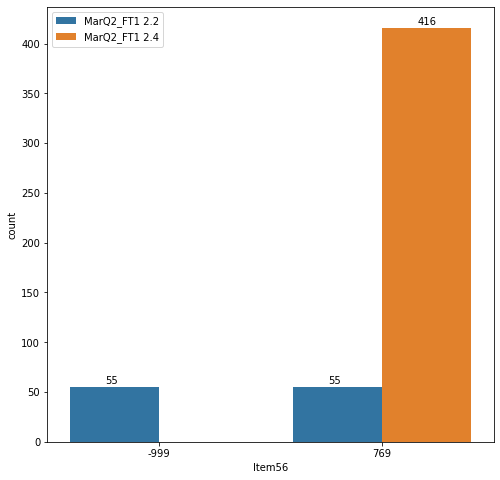

In [22]:
plt.figure(figsize=(8,8))
ax = sns.countplot(data=df[df.Item56!=0], x='Item56', hue='TestProgramVersion')
plt.legend(loc = 'upper left')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.16, p.get_height()+3))